In [4715]:
import numpy as np
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None
df = pd.read_csv("C:/Users/Lucky/Desktop/Highradius/H2HBABBA1058.csv")
df.shape


(50000, 19)

there are 50000 rows and 19 columns in the dataset


In [4716]:
df.head()

business_code cust_number   name_customer           clear_date  \
0          U001  0200707822        PUBLI co  2019-05-09 00:00:00   
1          U001  0200707741       SMART &    2019-02-06 00:00:00   
2          U001  0200793513  KROGER systems                  NaN   
3          U001  0200761734    H E BUT corp                  NaN   
4          U001  0200875006  KROGER systems  2019-11-29 00:00:00   

   buisness_year        doc_id posting_date  document_create_date  \
0         2019.0  1.929200e+09   2019-04-24              20190424   
1         2019.0  1.928665e+09   2019-01-23              20190123   
2         2020.0  1.930702e+09   2020-03-25              20200325   
3         2020.0  1.930676e+09   2020-03-23              20200320   
4         2019.0  1.930157e+09   2019-11-14              20191115   

   document_create_date.1  due_in_date invoice_currency document type  \
0                20190424   20190509.0              USD            RV   
1                20190123   20190207.0              USD            RV   
2                20200325   20200409.0              USD            RV   
3                20200323   20200407.0              USD            RV   
4                20191114   20191129.0              USD            RV   

   posting_id  area_business  total_open_amount  baseline_create_date  \
0         1.0            NaN           90639.05            20190424.0   
1         1.0            NaN           59345.39            20190123.0   
2         1.0            NaN          104111.31            20200325.0   
3         1.0            NaN           75339.82            20200323.0   
4         1.0            NaN           80333.77            20191114.0   

  cust_payment_terms    invoice_id  isOpen  
0               NAA8  1.929200e+09       0  
1               NAA8  1.928665e+09       0  
2               NAA8  1.930702e+09       1  
3               NAA8  1.930676e+09       1  
4               NAA8  1.930157e+09       0

In [4717]:
df.describe()

buisness_year        doc_id  document_create_date  \
count   50000.000000  5.000000e+04          5.000000e+04   
mean     2019.305620  2.011460e+09          2.019350e+07   
std         0.460674  2.803899e+08          4.492919e+03   
min      2019.000000  1.928490e+09          2.018123e+07   
25%      2019.000000  1.929339e+09          2.019051e+07   
50%      2019.000000  1.929960e+09          2.019091e+07   
75%      2020.000000  1.930619e+09          2.020013e+07   
max      2020.000000  9.500000e+09          2.020052e+07   

       document_create_date.1   due_in_date  posting_id  area_business  \
count            5.000000e+04  5.000000e+04     50000.0            0.0   
mean             2.019353e+07  2.019368e+07         1.0            NaN   
std              4.475969e+03  4.470164e+03         0.0            NaN   
min              2.018123e+07  2.018113e+07         1.0            NaN   
25%              2.019051e+07  2.019052e+07         1.0            NaN   
50%              2.019091e+07  2.019093e+07         1.0            NaN   
75%              2.020013e+07  2.020022e+07         1.0            NaN   
max              2.020052e+07  2.020071e+07         1.0            NaN   

       total_open_amount  baseline_create_date    invoice_id        isOpen  
count       5.000000e+04          5.000000e+04  4.999800e+04  50000.000000  
mean        3.233476e+04          2.019354e+07  2.011160e+09      0.200000  
std         3.938549e+04          4.477690e+03  2.763662e+08      0.400004  
min         7.200000e-01          2.018112e+07  1.928490e+09      0.000000  
25%         4.906423e+03          2.019051e+07  1.929339e+09      0.000000  
50%         1.745788e+04          2.019091e+07  1.929960e+09      0.000000  
75%         4.708203e+04          2.020013e+07  1.930619e+09      0.000000  
max         1.011888e+06          2.020052e+07  2.960634e+09      1.000000

In [4718]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [4719]:
n = df.nunique(axis=0)
print("No.of.unique values in each column :\n",n)

No.of.unique values in each column :
 business_code                 6
cust_number                1399
name_customer              4163
clear_date                  398
buisness_year                 2
doc_id                    48820
posting_date                504
document_create_date        505
document_create_date.1      504
due_in_date                 550
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44209
baseline_create_date        507
cust_payment_terms           77
invoice_id                48818
isOpen                        2
dtype: int64


# Data Preprocessing

In [4720]:
#check null in dataset in columns
[col for col in df.columns if df[col].isnull().sum() > 0]

['clear_date', 'area_business', 'invoice_id']

these are the columns which contain the null value


In [4721]:
#dropping the target coulumn dataset from main dataset which have null value
df2 = df[df['clear_date'].isnull()]
df = df.dropna(subset=['clear_date'])

#### drop the rows which have null values of the clear date column
#### store them in different dataframe (df2)
#### so df1 = main train dataset 
#### and df2= main test dataset

### Null Imputation

In [4722]:
df2.head()


business_code cust_number       name_customer clear_date  buisness_year  \
2           U001  0200793513      KROGER systems        NaN         2020.0   
3           U001  0200761734        H E BUT corp        NaN         2020.0   
6           U001  0200792734             MDV/ co        NaN         2020.0   
10          U001  0200769623          WAL-MAR us        NaN         2020.0   
16          U001  0200762301  C&S WH corporation        NaN         2020.0   

          doc_id posting_date  document_create_date  document_create_date.1  \
2   1.930702e+09   2020-03-25              20200325                20200325   
3   1.930676e+09   2020-03-23              20200320                20200323   
6   1.930844e+09   2020-05-01              20200501                20200501   
10  1.930671e+09   2020-03-20              20200319                20200320   
16  1.930664e+09   2020-03-18              20200317                20200318   

    due_in_date invoice_currency document type  posting_id  area_business  \
2    20200409.0              USD            RV         1.0            NaN   
3    20200407.0              USD            RV         1.0            NaN   
6    20200516.0              USD            RV         1.0            NaN   
10   20200404.0              USD            RV         1.0            NaN   
16   20200402.0              USD            RV         1.0            NaN   

    total_open_amount  baseline_create_date cust_payment_terms    invoice_id  \
2           104111.31            20200325.0               NAA8  1.930702e+09   
3            75339.82            20200323.0               NAA8  1.930676e+09   
6            33926.72            20200501.0               NAA8  1.930844e+09   
10             661.11            20200320.0               NAH4  1.930671e+09   
16           23857.56            20200318.0               NAC6  1.930664e+09   

    isOpen  
2        1  
3        1  
6        1  
10       1  
16       1

In [4723]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    2
isOpen                        0
dtype: int64

In [4724]:
#dropping the area_business column
df.drop("area_business",axis='columns',inplace=True)


dropping the area_business column because it have all values are null 

In [4725]:
df.shape

(40000, 18)

In [4726]:
#checking the where invoice_id is null
df[df['invoice_id'].isnull()]

business_code cust_number      name_customer           clear_date  \
13697          CA02  0140104429  COSTCO foundation  2019-05-22 00:00:00   
37065          CA02  0140106054          TREE  llc  2019-05-22 00:00:00   

       buisness_year        doc_id posting_date  document_create_date  \
13697         2019.0  9.500000e+09   2019-03-29              20190329   
37065         2019.0  9.500000e+09   2019-03-29              20190329   

       document_create_date.1  due_in_date invoice_currency document type  \
13697                20190322   20190401.0              CAD            X2   
37065                20190301   20190311.0              CAD            X2   

       posting_id  total_open_amount  baseline_create_date cust_payment_terms  \
13697         1.0            5353.20            20190322.0               CA10   
37065         1.0           21245.76            20190301.0               CA10   

       invoice_id  isOpen  
13697         NaN       0  
37065         NaN       0

these are two rows which contain the null value

In [4727]:
#clear the rows which have invoice_id=null 
df = df.dropna(subset=['invoice_id'])
df.shape


(39998, 18)

After removing null values from the data. we have 
rows = 49998 , columns = 18

### Finding constant column and duplicate data

In [4728]:
#finding constant column and removing them
unique_cols =  [x for x in df.columns if df[x].nunique()==1] 
print(unique_cols)


['document type', 'posting_id', 'isOpen']


these are the constant column and now remove them

In [4729]:
df.drop(unique_cols,axis=1,inplace=True)
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'total_open_amount', 'baseline_create_date', 'cust_payment_terms',
       'invoice_id'],
      dtype='object')

In [4730]:
duplicate = df[df.duplicated()]
print("duplicate rows")
duplicate

duplicate rows


business_code cust_number      name_customer           clear_date  \
532            U001  0200900909           SYSCO co  2019-03-04 00:00:00   
1792           U001  0200769623       WAL-MAR corp  2019-02-14 00:00:00   
2588           U001  0200726979          BJ'S  llc  2019-01-28 00:00:00   
2622           U001  0200781803               JRD   2019-09-05 00:00:00   
3290           U002  0200816950  COLOM corporation  2019-09-25 00:00:00   
...             ...         ...                ...                  ...   
49810          U001  0200782001           GORDO us  2019-11-19 00:00:00   
49860          U001  0200706844            WINC us  2019-12-05 00:00:00   
49950          U001  0200744019   TARG corporation  2019-05-15 00:00:00   
49964          U001  0100043936         PAPA JO co  2020-01-31 00:00:00   
49999          U001  0200726979           BJ'S  in  2019-09-16 00:00:00   

       buisness_year        doc_id posting_date  document_create_date  \
532           2019.0  1.928790e+09   2019-02-15              20190212   
1792          2019.0  1.928728e+09   2019-02-04              20190203   
2588          2019.0  1.928616e+09   2019-01-11              20190112   
2622          2019.0  1.929767e+09   2019-08-21              20190820   
3290          2019.0  1.990567e+09   2019-08-24              20190820   
...              ...           ...          ...                   ...   
49810         2019.0  1.930057e+09   2019-10-30              20191028   
49860         2019.0  1.930152e+09   2019-11-20              20191114   
49950         2019.0  1.929237e+09   2019-05-01              20190430   
49964         2020.0  1.930416e+09   2020-01-21              20200120   
49999         2019.0  1.929809e+09   2019-08-30              20190829   

       document_create_date.1  due_in_date invoice_currency  \
532                  20190215   20190302.0              USD   
1792                 20190204   20190219.0              USD   
2588                 20190111   20190126.0              USD   
2622                 20190821   20190905.0              USD   
3290                 20190824   20190923.0              USD   
...                       ...          ...              ...   
49810                20191030   20191114.0              USD   
49860                20191120   20191205.0              USD   
49950                20190501   20190516.0              USD   
49964                20200121   20200131.0              USD   
49999                20190830   20190914.0              USD   

       total_open_amount  baseline_create_date cust_payment_terms  \
532              7549.24            20190215.0               NAA8   
1792            13791.05            20190204.0               NAH4   
2588              314.38            20190111.0               NAA8   
2622            22566.04            20190821.0               NAA8   
3290            89071.30            20190824.0               NA38   
...                  ...                   ...                ...   
49810            5129.66            20191030.0               NAA8   
49860             770.47            20191120.0               NAA8   
49950              10.56            20190501.0               NAA8   
49964           18135.88            20200121.0               NA10   
49999             471.30            20190830.0               NAA8   

         invoice_id  
532    1.928790e+09  
1792   1.928728e+09  
2588   1.928616e+09  
2622   1.929767e+09  
3290   1.990567e+09  
...             ...  
49810  1.930057e+09  
49860  1.930152e+09  
49950  1.929237e+09  
49964  1.930416e+09  
49999  1.929809e+09  

[856 rows x 15 columns]

these are the duplicate rows in dataframe

In [4731]:
df.duplicated().sum()

856

In [4732]:
#drop duplicates from datafroame
df.drop_duplicates(inplace=True)
df.shape

(39142, 15)

after removing duplicated data rows: 48818, colums:18

In [4733]:
df["document_create_date"].equals(df["document_create_date.1"])



False

In [4734]:
df["posting_date"].equals(df["baseline_create_date"])

False

In [4735]:
df["invoice_id"].equals(df["doc_id"])


True

here we can see invoice_id and doc_id are same so we can drop any one of them

In [4736]:
# dropping the doc_id beacuse of duplication with invoice_id
df.drop("doc_id",axis='columns',inplace=True)

In [4737]:
df.drop("document_create_date",axis='columns',inplace=True) 

dropping the document_create_date column because in dataset the document_create_date.1 column is the normalised column
column of document_create_date and it does not seems any relation with my target column

In [4738]:
df.shape

(39142, 13)

In [4739]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39142 entries, 0 to 49998
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           39142 non-null  object 
 1   cust_number             39142 non-null  object 
 2   name_customer           39142 non-null  object 
 3   clear_date              39142 non-null  object 
 4   buisness_year           39142 non-null  float64
 5   posting_date            39142 non-null  object 
 6   document_create_date.1  39142 non-null  int64  
 7   due_in_date             39142 non-null  float64
 8   invoice_currency        39142 non-null  object 
 9   total_open_amount       39142 non-null  float64
 10  baseline_create_date    39142 non-null  float64
 11  cust_payment_terms      39142 non-null  object 
 12  invoice_id              39142 non-null  float64
dtypes: float64(5), int64(1), object(7)
memory usage: 4.2+ MB


No.of.unique values in each column 

### DateTime conversion

In [4740]:
#changing the data type of dates cloumn to date-time
df.loc[:,'document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')
df.loc[:,'baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')
df.loc[:,'due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')



In [4741]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39142 entries, 0 to 49998
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           39142 non-null  object        
 1   cust_number             39142 non-null  object        
 2   name_customer           39142 non-null  object        
 3   clear_date              39142 non-null  object        
 4   buisness_year           39142 non-null  float64       
 5   posting_date            39142 non-null  object        
 6   document_create_date.1  39142 non-null  datetime64[ns]
 7   due_in_date             39142 non-null  datetime64[ns]
 8   invoice_currency        39142 non-null  object        
 9   total_open_amount       39142 non-null  float64       
 10  baseline_create_date    39142 non-null  datetime64[ns]
 11  cust_payment_terms      39142 non-null  object        
 12  invoice_id              39142 non-null  float6

In [4742]:
#we have change these seprately bcz these already given in date format
df["clear_date"]= pd.to_datetime(df["clear_date"])
df["posting_date"]= pd.to_datetime(df["posting_date"])


we have change these seprately bcz these already given in date format

In [4743]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39142 entries, 0 to 49998
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           39142 non-null  object        
 1   cust_number             39142 non-null  object        
 2   name_customer           39142 non-null  object        
 3   clear_date              39142 non-null  datetime64[ns]
 4   buisness_year           39142 non-null  float64       
 5   posting_date            39142 non-null  datetime64[ns]
 6   document_create_date.1  39142 non-null  datetime64[ns]
 7   due_in_date             39142 non-null  datetime64[ns]
 8   invoice_currency        39142 non-null  object        
 9   total_open_amount       39142 non-null  float64       
 10  baseline_create_date    39142 non-null  datetime64[ns]
 11  cust_payment_terms      39142 non-null  object        
 12  invoice_id              39142 non-null  float6

In [4744]:
df.invoice_currency.unique()

array(['USD', 'CAD'], dtype=object)

we have two currency in the dataset so we have to change in unique currency eithier USD or CAD

In [4745]:
df['target_delay'] = df['clear_date'] - df['due_in_date']

target column introduce into dataset 

In [4746]:
df.head()


business_code cust_number       name_customer clear_date  buisness_year  \
0          U001  0200707822            PUBLI co 2019-05-09         2019.0   
1          U001  0200707741           SMART &   2019-02-06         2019.0   
4          U001  0200875006      KROGER systems 2019-11-29         2019.0   
5          U001  0200790165    CONSO foundation 2020-03-16         2020.0   
7          U001  0200769623  WAL-MAR associates 2019-03-01         2019.0   

  posting_date document_create_date.1 due_in_date invoice_currency  \
0   2019-04-24             2019-04-24  2019-05-09              USD   
1   2019-01-23             2019-01-23  2019-02-07              USD   
4   2019-11-14             2019-11-14  2019-11-29              USD   
5   2020-02-24             2020-02-24  2020-03-10              USD   
7   2019-02-19             2019-02-19  2019-03-06              USD   

   total_open_amount baseline_create_date cust_payment_terms    invoice_id  \
0           90639.05           2019-04-24               NAA8  1.929200e+09   
1           59345.39           2019-01-23               NAA8  1.928665e+09   
4           80333.77           2019-11-14               NAA8  1.930157e+09   
5           11508.00           2020-02-24               NAA8  1.930565e+09   
7           44345.54           2019-02-19               NAH4  1.928823e+09   

  target_delay  
0       0 days  
1      -1 days  
4       0 days  
5       6 days  
7      -5 days

In [4747]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39142 entries, 0 to 49998
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   business_code           39142 non-null  object         
 1   cust_number             39142 non-null  object         
 2   name_customer           39142 non-null  object         
 3   clear_date              39142 non-null  datetime64[ns] 
 4   buisness_year           39142 non-null  float64        
 5   posting_date            39142 non-null  datetime64[ns] 
 6   document_create_date.1  39142 non-null  datetime64[ns] 
 7   due_in_date             39142 non-null  datetime64[ns] 
 8   invoice_currency        39142 non-null  object         
 9   total_open_amount       39142 non-null  float64        
 10  baseline_create_date    39142 non-null  datetime64[ns] 
 11  cust_payment_terms      39142 non-null  object         
 12  invoice_id              39142 no

now check the data type of the target column

In [4748]:
df['target_delay'] = pd.to_numeric(df['target_delay'].dt.days, downcast='signed')

changing the dtype of the target column into int

In [4749]:
df["target_delay"].dtypes

dtype('int16')

Dropping the irerrelevant column : posting_date because its is not given in PRS list of column 
and not any connection with target column

In [4750]:
#dropping the irerrelevant column : posting_date because its is not given in PRS list of column and not any connection with target column
df.drop("posting_date",axis="columns",inplace=True)

In [4751]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'document_create_date.1', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms', 'invoice_id', 'target_delay'],
      dtype='object')

In [4752]:
df=df.sort_values(['baseline_create_date'], ascending=True)

sorting dataset according to baseline_create_date  in ascending order

In [4753]:
df.head()

business_code cust_number      name_customer clear_date  buisness_year  \
42749          CA02  0140104249             SOB in 2019-01-22         2019.0   
4679           U001  0100000158           CASC llc 2019-01-03         2019.0   
14833          U001  0200706844            WINC co 2019-02-13         2019.0   
19351          U001  0200726979  BJ'S  corporation 2019-01-15         2019.0   
6879           U001  0200769623         WAL-MAR us 2019-01-10         2019.0   

      document_create_date.1 due_in_date invoice_currency  total_open_amount  \
42749             2019-01-15  2018-11-29              CAD            1673.00   
4679              2019-01-03  2019-02-18              USD             274.24   
14833             2019-01-29  2018-12-23              USD          100627.99   
19351             2018-12-30  2019-01-14              USD             111.22   
6879              2018-12-30  2019-01-14              USD           69578.99   

      baseline_create_date cust_payment_terms    invoice_id  target_delay  
42749           2018-11-19               CA10  2.960523e+09            54  
4679            2018-11-20               NAVM  1.928555e+09           -46  
14833           2018-12-08               NAA8  1.928706e+09            52  
19351           2018-12-30               NAA8  1.928541e+09             1  
6879            2018-12-30               NAH4  1.928533e+09            -4

In [4754]:
df.invoice_currency.unique()

array(['CAD', 'USD'], dtype=object)

#### changing the invoice currency into CAD FROM USD
##### rows which have Currency in Usd. changing them into CAD
#### 1 CAD= 0.79 USD 
   

In [4755]:
x = df[df['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.79)    

for i in x.index:
    df['total_open_amount'][i] = 0.79*x[i]


Now drop the invoice_currency column

In [4756]:
df.drop("invoice_currency",axis='columns',inplace=True)


In [4757]:
df.head()

business_code cust_number      name_customer clear_date  buisness_year  \
42749          CA02  0140104249             SOB in 2019-01-22         2019.0   
4679           U001  0100000158           CASC llc 2019-01-03         2019.0   
14833          U001  0200706844            WINC co 2019-02-13         2019.0   
19351          U001  0200726979  BJ'S  corporation 2019-01-15         2019.0   
6879           U001  0200769623         WAL-MAR us 2019-01-10         2019.0   

      document_create_date.1 due_in_date  total_open_amount  \
42749             2019-01-15  2018-11-29          1044.1193   
4679              2019-01-03  2019-02-18           274.2400   
14833             2019-01-29  2018-12-23        100627.9900   
19351             2018-12-30  2019-01-14           111.2200   
6879              2018-12-30  2019-01-14         69578.9900   

      baseline_create_date cust_payment_terms    invoice_id  target_delay  
42749           2018-11-19               CA10  2.960523e+09            54  
4679            2018-11-20               NAVM  1.928555e+09           -46  
14833           2018-12-08               NAA8  1.928706e+09            52  
19351           2018-12-30               NAA8  1.928541e+09             1  
6879            2018-12-30               NAH4  1.928533e+09            -4

# EDA

In [4758]:
df.nunique()

business_code                 6
cust_number                1337
name_customer              3869
clear_date                  398
buisness_year                 2
document_create_date.1      421
due_in_date                 489
total_open_amount         35703
baseline_create_date        433
cust_payment_terms           75
invoice_id                39142
target_delay                176
dtype: int64

##### Mode (catogorial data)

In [4759]:
#finding the mode of the catogorial data
df[['business_code','buisness_year','cust_payment_terms','name_customer']].agg(pd.Series.mode)        

business_code  buisness_year cust_payment_terms       name_customer
0          U001         2019.0               NAA8  WAL-MAR associates

here we can see that mode gives the most ocuuring data in the different colums

#### Mean (continous variables)

In [4760]:
#now lets find out the mean and standard deviation of the contionous column 
df['total_open_amount'].agg(['mean','std'])

mean    30663.398303
std     36042.941028
Name: total_open_amount, dtype: float64

mean telling us the average value of the total_open_amount and standard deviation tells how far each observed value is from the mean.

#### Median (discrete column)

In [4761]:
#lets find the median of the discrete data
df[['invoice_id',]].agg(np.median)   
df.head()

business_code cust_number      name_customer clear_date  buisness_year  \
42749          CA02  0140104249             SOB in 2019-01-22         2019.0   
4679           U001  0100000158           CASC llc 2019-01-03         2019.0   
14833          U001  0200706844            WINC co 2019-02-13         2019.0   
19351          U001  0200726979  BJ'S  corporation 2019-01-15         2019.0   
6879           U001  0200769623         WAL-MAR us 2019-01-10         2019.0   

      document_create_date.1 due_in_date  total_open_amount  \
42749             2019-01-15  2018-11-29          1044.1193   
4679              2019-01-03  2019-02-18           274.2400   
14833             2019-01-29  2018-12-23        100627.9900   
19351             2018-12-30  2019-01-14           111.2200   
6879              2018-12-30  2019-01-14         69578.9900   

      baseline_create_date cust_payment_terms    invoice_id  target_delay  
42749           2018-11-19               CA10  2.960523e+09            54  
4679            2018-11-20               NAVM  1.928555e+09           -46  
14833           2018-12-08               NAA8  1.928706e+09            52  
19351           2018-12-30               NAA8  1.928541e+09             1  
6879            2018-12-30               NAH4  1.928533e+09            -4

#### lets check the behaviour of target column (central tendecy of target coulmn)

<AxesSubplot:xlabel='target_delay', ylabel='Density'>

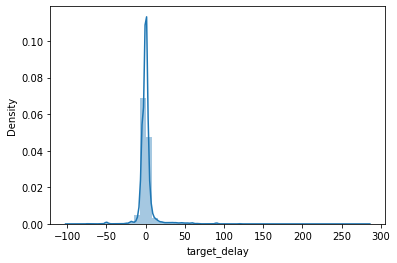

In [4762]:
sns.distplot(df["target_delay"])

#### now we can see that the graph is NORMALLY Distributed (i.e mean, median and mode are almost same)
#### So outlier will be calculated on upper_boundary and lower_boundary of the tail of the graph
#### upper_boundary = mean + 3*standard deviation (calculated value in below cell)
#### lower_boundary = mean - 3*standard deviation


## Outlier Detection

In [4763]:
df.target_delay.min() , df.target_delay.max()

(-98, 282)

In [4764]:
upper_limit= df.target_delay.mean() + 3 * df.target_delay.std()
upper_limit

34.16818796306288

In [4765]:
lower_limit= df.target_delay.mean() - 3 * df.target_delay.std()
lower_limit

-32.38274010654047

In [4766]:
df.shape

(39142, 12)

In [4767]:
 df_outlier = df[(df.target_delay > upper_limit) | (df.target_delay < lower_limit)]

store the oulier into df_outlier dataframe so that we can drop them 

In [4768]:
df = df.drop(df_outlyer.index, axis=0)

In [4769]:
df.shape

(38126, 12)

### now split the df data frame into train test validation set


In [4770]:
X = df.drop(['target_delay'],axis=1)
y = df['target_delay']
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0,shuffle=False)
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0,shuffle=False)
X_train.shape, X_val.shape, X_test.shape

((26688, 11), (5719, 11), (5719, 11))

In [4771]:
X_train["invoice_id"].mean()

2010956664.3017461

In [4772]:
y_train.agg(['mean'])

mean    0.155276
Name: target_delay, dtype: float64

In [4773]:
y_train.describe()

count    26688.000000
mean         0.155276
std          5.302738
min        -32.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max         34.000000
Name: target_delay, dtype: float64

#### Lets check the behaviour of target column after splitting 

<AxesSubplot:xlabel='target_delay', ylabel='Density'>

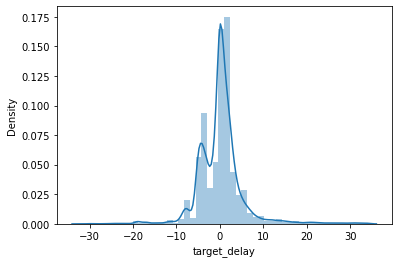

In [4774]:
sns.distplot(y_train)

#### here can see that the graph is almost NORMALLY Distributed (mean, median and mode are almost same)



In [4775]:
y_train.min()

-32

In [4776]:
y_train.max()

34

In [4777]:
y_train.describe()

count    26688.000000
mean         0.155276
std          5.302738
min        -32.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max         34.000000
Name: target_delay, dtype: float64

In [4778]:
y_train.head()


19351    1
6879    -4
973      1
27786   -5
27833    1
Name: target_delay, dtype: int16

In [4779]:
type(y_train)

pandas.core.series.Series

In [4780]:
X_train.head()

business_code cust_number       name_customer clear_date  buisness_year  \
19351          U001  0200726979   BJ'S  corporation 2019-01-15         2019.0   
6879           U001  0200769623          WAL-MAR us 2019-01-10         2019.0   
973            U001  0200726979              BJ'S   2019-01-15         2019.0   
27786          U001  0200769623  WAL-MAR foundation 2019-01-09         2019.0   
27833          U001  0200769623          WAL-MAR co 2019-01-15         2019.0   

      document_create_date.1 due_in_date  total_open_amount  \
19351             2018-12-30  2019-01-14             111.22   
6879              2018-12-30  2019-01-14           69578.99   
973               2018-12-30  2019-01-14             484.42   
27786             2018-12-30  2019-01-14           43667.74   
27833             2018-12-30  2019-01-14           32021.70   

      baseline_create_date cust_payment_terms    invoice_id  
19351           2018-12-30               NAA8  1.928541e+09  
6879            2018-12-30               NAH4  1.928533e+09  
973             2018-12-30               NAA8  1.928541e+09  
27786           2018-12-30               NAH4  1.928539e+09  
27833           2018-12-30               NAH4  1.928537e+09

# scatterplot

<AxesSubplot:xlabel='target_delay', ylabel='baseline_create_date'>

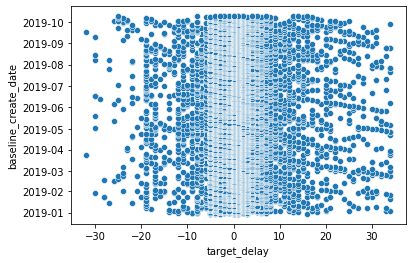

In [4781]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="target_delay", y="baseline_create_date")

so there no any specific trend or any realtion in between the target column and the baseline_create_date 
we can see target delays value mostly lies in between (-10 to +10) 

<AxesSubplot:xlabel='target_delay', ylabel='due_in_date'>

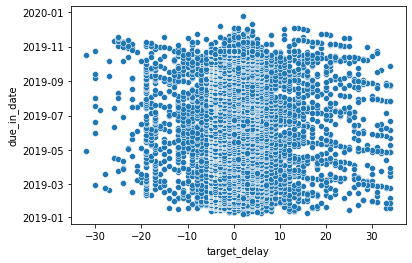

In [4782]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="target_delay", y="due_in_date")

so there no any specific trend or any realtion in between the target column and the due_in_date 
we can see target delays value mostly lies in between (-10 to +10)

<AxesSubplot:xlabel='target_delay', ylabel='clear_date'>

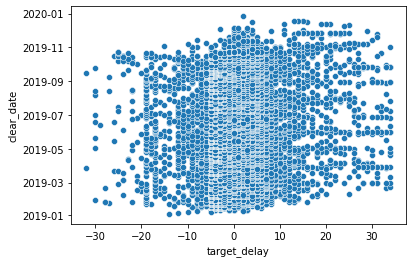

In [4783]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="target_delay", y="clear_date")

<AxesSubplot:xlabel='target_delay', ylabel='total_open_amount'>

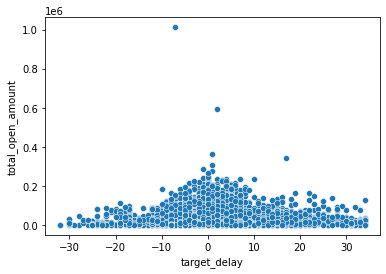

In [4784]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="target_delay", y="total_open_amount")

here we can see there is no specific trend and huge area of of high amount given in less delay of the payment

In [4785]:
X_train.head()

business_code cust_number       name_customer clear_date  buisness_year  \
19351          U001  0200726979   BJ'S  corporation 2019-01-15         2019.0   
6879           U001  0200769623          WAL-MAR us 2019-01-10         2019.0   
973            U001  0200726979              BJ'S   2019-01-15         2019.0   
27786          U001  0200769623  WAL-MAR foundation 2019-01-09         2019.0   
27833          U001  0200769623          WAL-MAR co 2019-01-15         2019.0   

      document_create_date.1 due_in_date  total_open_amount  \
19351             2018-12-30  2019-01-14             111.22   
6879              2018-12-30  2019-01-14           69578.99   
973               2018-12-30  2019-01-14             484.42   
27786             2018-12-30  2019-01-14           43667.74   
27833             2018-12-30  2019-01-14           32021.70   

      baseline_create_date cust_payment_terms    invoice_id  
19351           2018-12-30               NAA8  1.928541e+09  
6879            2018-12-30               NAH4  1.928533e+09  
973             2018-12-30               NAA8  1.928541e+09  
27786           2018-12-30               NAH4  1.928539e+09  
27833           2018-12-30               NAH4  1.928537e+09

# Bar Plot

### lets see the bar plot graph bwn target coulmn and categorial data

In [4786]:
X_train.nunique()

business_code                 6
cust_number                1193
name_customer              3282
clear_date                  271
buisness_year                 1
document_create_date.1      285
due_in_date                 335
total_open_amount         24573
baseline_create_date        284
cust_payment_terms           64
invoice_id                26688
dtype: int64

<AxesSubplot:xlabel='business_code', ylabel='target_delay'>

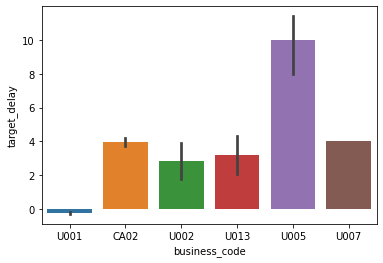

In [4787]:
sns.barplot(data=X_train.merge(y_train,on = X_train.index), x="business_code", y="target_delay")

here we can see a relation in between the target column and the business_code column i.e      
customers which having business_code='U007' make late payement means the delay is more for them 

<AxesSubplot:xlabel='buisness_year', ylabel='target_delay'>

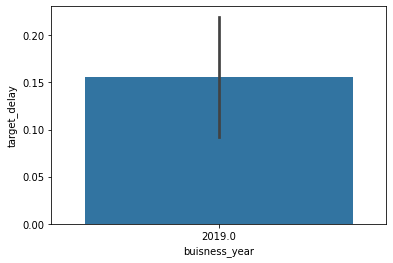

In [4788]:
sns.barplot(data=X_train.merge(y_train,on = X_train.index), x="buisness_year", y="target_delay")

here we can see that the buisness_year column is constant column   
so we can drop it from train , val and test dataset

In [4789]:
#drop the constant column business_year
X_train.drop("buisness_year",axis='columns',inplace=True)

In [4790]:
X_val.drop("buisness_year",axis='columns',inplace=True)

In [4791]:
X_test.drop("buisness_year",axis='columns',inplace=True)

In [4792]:
X_train.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'document_create_date.1', 'due_in_date', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id'],
      dtype='object')

# Feature Engineering

In [4793]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26688 entries, 19351 to 8126
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           26688 non-null  object        
 1   cust_number             26688 non-null  object        
 2   name_customer           26688 non-null  object        
 3   clear_date              26688 non-null  datetime64[ns]
 4   document_create_date.1  26688 non-null  datetime64[ns]
 5   due_in_date             26688 non-null  datetime64[ns]
 6   total_open_amount       26688 non-null  float64       
 7   baseline_create_date    26688 non-null  datetime64[ns]
 8   cust_payment_terms      26688 non-null  object        
 9   invoice_id              26688 non-null  float64       
dtypes: datetime64[ns](4), float64(2), object(4)
memory usage: 2.2+ MB


In [4794]:
X_train.head()

business_code cust_number       name_customer clear_date  \
19351          U001  0200726979   BJ'S  corporation 2019-01-15   
6879           U001  0200769623          WAL-MAR us 2019-01-10   
973            U001  0200726979              BJ'S   2019-01-15   
27786          U001  0200769623  WAL-MAR foundation 2019-01-09   
27833          U001  0200769623          WAL-MAR co 2019-01-15   

      document_create_date.1 due_in_date  total_open_amount  \
19351             2018-12-30  2019-01-14             111.22   
6879              2018-12-30  2019-01-14           69578.99   
973               2018-12-30  2019-01-14             484.42   
27786             2018-12-30  2019-01-14           43667.74   
27833             2018-12-30  2019-01-14           32021.70   

      baseline_create_date cust_payment_terms    invoice_id  
19351           2018-12-30               NAA8  1.928541e+09  
6879            2018-12-30               NAH4  1.928533e+09  
973             2018-12-30               NAA8  1.928541e+09  
27786           2018-12-30               NAH4  1.928539e+09  
27833           2018-12-30               NAH4  1.928537e+09

### Label Encoding

In [4795]:
from sklearn.preprocessing import LabelEncoder
business_code_enc = LabelEncoder()
business_code_enc.fit(X_train['business_code'])
X_train['business_code_enc'] = business_code_enc.transform(X_train['business_code'])


In [4796]:
X_train[['business_code_enc','business_code']]

business_code_enc business_code
19351                  1          U001
6879                   1          U001
973                    1          U001
27786                  1          U001
27833                  1          U001
...                  ...           ...
12306                  1          U001
4000                   1          U001
25118                  1          U001
19928                  1          U001
8126                   1          U001

[26688 rows x 2 columns]

In [4797]:
X_val['business_code_enc'] = business_code_enc.transform(X_val['business_code'])
X_test['business_code_enc'] = business_code_enc.transform(X_test['business_code'])

In [4798]:
X_val[['business_code_enc','business_code']],X_test[['business_code_enc','business_code']]

(       business_code_enc business_code
 1867                   1          U001
 18280                  1          U001
 26483                  1          U001
 19719                  1          U001
 8622                   1          U001
 ...                  ...           ...
 37038                  1          U001
 49569                  1          U001
 38018                  1          U001
 11080                  1          U001
 11754                  1          U001
 
 [5719 rows x 2 columns],
        business_code_enc business_code
 40290                  1          U001
 3926                   1          U001
 19907                  1          U001
 30103                  1          U001
 42487                  1          U001
 ...                  ...           ...
 38544                  0          CA02
 9061                   0          CA02
 39697                  0          CA02
 8889                   0          CA02
 11908                  1          U001
 
 [5719 row

In [4799]:
#defining the function for dropping the coumns after encoding
def drop_columnenc(col ,trainf = X_train,valf = X_val,testf = X_test):
    trainf.drop(col, axis =1,inplace=True)
    valf.drop(col,axis=1 , inplace=True)
    testf.drop(col,axis=1 , inplace=True)

    return trainf,valf,testf

In [4800]:
X_train ,X_val, X_test = drop_columnenc(['business_code'])

In [4801]:
X_train.head()

cust_number       name_customer clear_date document_create_date.1  \
19351  0200726979   BJ'S  corporation 2019-01-15             2018-12-30   
6879   0200769623          WAL-MAR us 2019-01-10             2018-12-30   
973    0200726979              BJ'S   2019-01-15             2018-12-30   
27786  0200769623  WAL-MAR foundation 2019-01-09             2018-12-30   
27833  0200769623          WAL-MAR co 2019-01-15             2018-12-30   

      due_in_date  total_open_amount baseline_create_date cust_payment_terms  \
19351  2019-01-14             111.22           2018-12-30               NAA8   
6879   2019-01-14           69578.99           2018-12-30               NAH4   
973    2019-01-14             484.42           2018-12-30               NAA8   
27786  2019-01-14           43667.74           2018-12-30               NAH4   
27833  2019-01-14           32021.70           2018-12-30               NAH4   

         invoice_id  business_code_enc  
19351  1.928541e+09                  1  
6879   1.928533e+09                  1  
973    1.928541e+09                  1  
27786  1.928539e+09                  1  
27833  1.928537e+09                  1

In [4802]:
cust_payment_terms_enc = LabelEncoder()
cust_payment_terms_enc.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc'] = cust_payment_terms_enc.transform(X_train['cust_payment_terms'])




In [4803]:
X_train[['cust_payment_terms_enc','cust_payment_terms']]

cust_payment_terms_enc cust_payment_terms
19351                      20               NAA8
6879                       33               NAH4
973                        20               NAA8
27786                      33               NAH4
27833                      33               NAH4
...                       ...                ...
12306                      22               NAAX
4000                       20               NAA8
25118                      33               NAH4
19928                      20               NAA8
8126                       20               NAA8

[26688 rows x 2 columns]

In [4804]:

# finding what are the new catagories in the validation set
diff = set(X_val['cust_payment_terms'])-set(cust_payment_terms_enc.classes_)

# adding them to the classess variable 
for items in diff:
    cust_payment_terms_enc.classes_ = np.append(cust_payment_terms_enc.classes_,items)

 Here we oberserve the different catagories in the validation set and test set
so make classes variable so we can label encode easily data in validation set and test set 

In [4805]:

X_val['cust_payment_terms_enc'] = cust_payment_terms_enc.transform(X_val['cust_payment_terms'])

In [4806]:
X_val[['cust_payment_terms_enc','cust_payment_terms']]

cust_payment_terms_enc cust_payment_terms
1867                       33               NAH4
18280                      33               NAH4
26483                      25               NAC6
19719                      33               NAH4
8622                       33               NAH4
...                       ...                ...
37038                      20               NAA8
49569                      33               NAH4
38018                      33               NAH4
11080                      33               NAH4
11754                      33               NAH4

[5719 rows x 2 columns]

In [4807]:
# finding what are the new catagories in the validation set
diff = set(X_test['cust_payment_terms'])-set(cust_payment_terms_enc.classes_)

# adding them to the classess variable 
for items in diff:
    cust_payment_terms_enc.classes_ = np.append(cust_payment_terms_enc.classes_,items)

In [4808]:
X_test['cust_payment_terms_enc'] = cust_payment_terms_enc.transform(X_test['cust_payment_terms'])

In [4809]:
X_train ,X_val, X_test = drop_columnenc(['cust_payment_terms'])

In [4810]:
X_train.head()

cust_number       name_customer clear_date document_create_date.1  \
19351  0200726979   BJ'S  corporation 2019-01-15             2018-12-30   
6879   0200769623          WAL-MAR us 2019-01-10             2018-12-30   
973    0200726979              BJ'S   2019-01-15             2018-12-30   
27786  0200769623  WAL-MAR foundation 2019-01-09             2018-12-30   
27833  0200769623          WAL-MAR co 2019-01-15             2018-12-30   

      due_in_date  total_open_amount baseline_create_date    invoice_id  \
19351  2019-01-14             111.22           2018-12-30  1.928541e+09   
6879   2019-01-14           69578.99           2018-12-30  1.928533e+09   
973    2019-01-14             484.42           2018-12-30  1.928541e+09   
27786  2019-01-14           43667.74           2018-12-30  1.928539e+09   
27833  2019-01-14           32021.70           2018-12-30  1.928537e+09   

       business_code_enc  cust_payment_terms_enc  
19351                  1                      20  
6879                   1                      33  
973                    1                      20  
27786                  1                      33  
27833                  1                      33

In [4811]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26688 entries, 19351 to 8126
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             26688 non-null  object        
 1   name_customer           26688 non-null  object        
 2   clear_date              26688 non-null  datetime64[ns]
 3   document_create_date.1  26688 non-null  datetime64[ns]
 4   due_in_date             26688 non-null  datetime64[ns]
 5   total_open_amount       26688 non-null  float64       
 6   baseline_create_date    26688 non-null  datetime64[ns]
 7   invoice_id              26688 non-null  float64       
 8   business_code_enc       26688 non-null  int32         
 9   cust_payment_terms_enc  26688 non-null  int32         
dtypes: datetime64[ns](4), float64(2), int32(2), object(2)
memory usage: 2.0+ MB


In [4812]:
cust_number_enc = LabelEncoder()
cust_number_enc.fit(X_train['cust_number'])
X_train['cust_number_enc'] = cust_number_enc.transform(X_train['cust_number'])

In [4813]:

# finding what are the new catagories in the validation set
diff = set(X_val['cust_number'])-set(cust_number_enc.classes_)

# adding them to the classess variable 
for items in diff:
    cust_number_enc.classes_ = np.append(cust_number_enc.classes_,items)

In [4814]:
X_val['cust_number_enc'] = cust_number_enc.transform(X_val['cust_number'])

In [4815]:
# finding what are the new catagories in the validation set
diff = set(X_test['cust_number'])-set(cust_number_enc.classes_)

# adding them to the classess variable // 
for items in diff:
    cust_number_enc.classes_ = np.append(cust_number_enc.classes_,items)

In [4816]:
X_test['cust_number_enc'] = cust_number_enc.transform(X_test['cust_number'])

In [4817]:
X_train ,X_val, X_test = drop_columnenc(['cust_number'])

In [4818]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26688 entries, 19351 to 8126
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name_customer           26688 non-null  object        
 1   clear_date              26688 non-null  datetime64[ns]
 2   document_create_date.1  26688 non-null  datetime64[ns]
 3   due_in_date             26688 non-null  datetime64[ns]
 4   total_open_amount       26688 non-null  float64       
 5   baseline_create_date    26688 non-null  datetime64[ns]
 6   invoice_id              26688 non-null  float64       
 7   business_code_enc       26688 non-null  int32         
 8   cust_payment_terms_enc  26688 non-null  int32         
 9   cust_number_enc         26688 non-null  int32         
dtypes: datetime64[ns](4), float64(2), int32(3), object(1)
memory usage: 1.9+ MB


In [4819]:
name_customer_enc = LabelEncoder()
name_customer_enc.fit(X_train['name_customer'])
X_train['name_customer_enc'] = name_customer_enc.transform(X_train['name_customer'])

In [4820]:
# finding what are the new catagories in the validation set
diff = set(X_val['name_customer'])-set(name_customer_enc.classes_)

# adding them to the classess variable 
for items in diff:
    name_customer_enc.classes_ = np.append(name_customer_enc.classes_,items)

In [4821]:
X_val['name_customer_enc'] = name_customer_enc.transform(X_val['name_customer'])

In [4822]:
# finding what are the new catagories in the validation set
diff = set(X_test['name_customer'])-set(name_customer_enc.classes_)

# adding them to the classess variable  
for items in diff:
    name_customer_enc.classes_ = np.append(name_customer_enc.classes_,items)

In [4823]:
X_test['name_customer_enc'] = name_customer_enc.transform(X_test['name_customer'])

In [4824]:
X_train ,X_val, X_test = drop_columnenc(['name_customer'])

In [4825]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26688 entries, 19351 to 8126
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   clear_date              26688 non-null  datetime64[ns]
 1   document_create_date.1  26688 non-null  datetime64[ns]
 2   due_in_date             26688 non-null  datetime64[ns]
 3   total_open_amount       26688 non-null  float64       
 4   baseline_create_date    26688 non-null  datetime64[ns]
 5   invoice_id              26688 non-null  float64       
 6   business_code_enc       26688 non-null  int32         
 7   cust_payment_terms_enc  26688 non-null  int32         
 8   cust_number_enc         26688 non-null  int32         
 9   name_customer_enc       26688 non-null  int32         
dtypes: datetime64[ns](4), float64(2), int32(4)
memory usage: 1.8 MB


## Manipulating dates

In [4826]:
#extract day,month and year 

for col in ['baseline_create_date','due_in_date','clear_date', 'document_create_date.1' ]:
    X_train['{}.day'.format(col)]=X_train[col].dt.day
    X_train['{}.year'.format(col)]=X_train[col].dt.year
    X_train['{}.month'.format(col)]=X_train[col].dt.month
    
   

In [4827]:
X_train.head()

clear_date document_create_date.1 due_in_date  total_open_amount  \
19351 2019-01-15             2018-12-30  2019-01-14             111.22   
6879  2019-01-10             2018-12-30  2019-01-14           69578.99   
973   2019-01-15             2018-12-30  2019-01-14             484.42   
27786 2019-01-09             2018-12-30  2019-01-14           43667.74   
27833 2019-01-15             2018-12-30  2019-01-14           32021.70   

      baseline_create_date    invoice_id  business_code_enc  \
19351           2018-12-30  1.928541e+09                  1   
6879            2018-12-30  1.928533e+09                  1   
973             2018-12-30  1.928541e+09                  1   
27786           2018-12-30  1.928539e+09                  1   
27833           2018-12-30  1.928537e+09                  1   

       cust_payment_terms_enc  cust_number_enc  name_customer_enc  ...  \
19351                      20              635                348  ...   
6879                       33              721               3185  ...   
973                        20              635                344  ...   
27786                      33              721               3180  ...   
27833                      33              721               3177  ...   

       baseline_create_date.month  due_in_date.day  due_in_date.year  \
19351                          12               14              2019   
6879                           12               14              2019   
973                            12               14              2019   
27786                          12               14              2019   
27833                          12               14              2019   

       due_in_date.month  clear_date.day  clear_date.year  clear_date.month  \
19351                  1              15             2019                 1   
6879                   1              10             2019                 1   
973                    1              15             2019                 1   
27786                  1               9             2019                 1   
27833                  1              15             2019                 1   

       document_create_date.1.day  document_create_date.1.year  \
19351                          30                         2018   
6879                           30                         2018   
973                            30                         2018   
27786                          30                         2018   
27833                          30                         2018   

       document_create_date.1.month  
19351                            12  
6879                             12  
973                              12  
27786                            12  
27833                            12  

[5 rows x 22 columns]

In [4828]:
for col in ['baseline_create_date','due_in_date','clear_date', 'document_create_date.1' ]:
    X_val['{}.day'.format(col)]=X_val[col].dt.day
    X_val['{}.year'.format(col)]=X_val[col].dt.year
    X_val['{}.month'.format(col)]=X_val[col].dt.month

In [4829]:
for col in ['baseline_create_date','due_in_date','clear_date', 'document_create_date.1' ]:
    X_test['{}.day'.format(col)]=X_test[col].dt.day
    X_test['{}.year'.format(col)]=X_test[col].dt.year
    X_test['{}.month'.format(col)]=X_test[col].dt.month

In [4830]:
X_train.head()

clear_date document_create_date.1 due_in_date  total_open_amount  \
19351 2019-01-15             2018-12-30  2019-01-14             111.22   
6879  2019-01-10             2018-12-30  2019-01-14           69578.99   
973   2019-01-15             2018-12-30  2019-01-14             484.42   
27786 2019-01-09             2018-12-30  2019-01-14           43667.74   
27833 2019-01-15             2018-12-30  2019-01-14           32021.70   

      baseline_create_date    invoice_id  business_code_enc  \
19351           2018-12-30  1.928541e+09                  1   
6879            2018-12-30  1.928533e+09                  1   
973             2018-12-30  1.928541e+09                  1   
27786           2018-12-30  1.928539e+09                  1   
27833           2018-12-30  1.928537e+09                  1   

       cust_payment_terms_enc  cust_number_enc  name_customer_enc  ...  \
19351                      20              635                348  ...   
6879                       33              721               3185  ...   
973                        20              635                344  ...   
27786                      33              721               3180  ...   
27833                      33              721               3177  ...   

       baseline_create_date.month  due_in_date.day  due_in_date.year  \
19351                          12               14              2019   
6879                           12               14              2019   
973                            12               14              2019   
27786                          12               14              2019   
27833                          12               14              2019   

       due_in_date.month  clear_date.day  clear_date.year  clear_date.month  \
19351                  1              15             2019                 1   
6879                   1              10             2019                 1   
973                    1              15             2019                 1   
27786                  1               9             2019                 1   
27833                  1              15             2019                 1   

       document_create_date.1.day  document_create_date.1.year  \
19351                          30                         2018   
6879                           30                         2018   
973                            30                         2018   
27786                          30                         2018   
27833                          30                         2018   

       document_create_date.1.month  
19351                            12  
6879                             12  
973                              12  
27786                            12  
27833                            12  

[5 rows x 22 columns]

In [4831]:
X_train ,X_val, X_test = drop_columnenc(['baseline_create_date'])

In [4832]:
X_train.head()

clear_date document_create_date.1 due_in_date  total_open_amount  \
19351 2019-01-15             2018-12-30  2019-01-14             111.22   
6879  2019-01-10             2018-12-30  2019-01-14           69578.99   
973   2019-01-15             2018-12-30  2019-01-14             484.42   
27786 2019-01-09             2018-12-30  2019-01-14           43667.74   
27833 2019-01-15             2018-12-30  2019-01-14           32021.70   

         invoice_id  business_code_enc  cust_payment_terms_enc  \
19351  1.928541e+09                  1                      20   
6879   1.928533e+09                  1                      33   
973    1.928541e+09                  1                      20   
27786  1.928539e+09                  1                      33   
27833  1.928537e+09                  1                      33   

       cust_number_enc  name_customer_enc  baseline_create_date.day  ...  \
19351              635                348                        30  ...   
6879               721               3185                        30  ...   
973                635                344                        30  ...   
27786              721               3180                        30  ...   
27833              721               3177                        30  ...   

       baseline_create_date.month  due_in_date.day  due_in_date.year  \
19351                          12               14              2019   
6879                           12               14              2019   
973                            12               14              2019   
27786                          12               14              2019   
27833                          12               14              2019   

       due_in_date.month  clear_date.day  clear_date.year  clear_date.month  \
19351                  1              15             2019                 1   
6879                   1              10             2019                 1   
973                    1              15             2019                 1   
27786                  1               9             2019                 1   
27833                  1              15             2019                 1   

       document_create_date.1.day  document_create_date.1.year  \
19351                          30                         2018   
6879                           30                         2018   
973                            30                         2018   
27786                          30                         2018   
27833                          30                         2018   

       document_create_date.1.month  
19351                            12  
6879                             12  
973                              12  
27786                            12  
27833                            12  

[5 rows x 21 columns]

In [4833]:
X_val.head()

clear_date document_create_date.1 due_in_date  total_open_amount  \
1867  2019-10-21             2019-10-09  2019-10-24           37458.39   
18280 2019-10-31             2019-10-09  2019-10-24            2875.39   
26483 2019-10-24             2019-10-09  2019-10-24            5451.24   
19719 2019-10-21             2019-10-09  2019-10-24           16753.80   
8622  2019-10-21             2019-10-09  2019-10-24            4902.83   

         invoice_id  business_code_enc  cust_payment_terms_enc  \
1867   1.929984e+09                  1                      33   
18280  1.929977e+09                  1                      33   
26483  1.929984e+09                  1                      25   
19719  1.929983e+09                  1                      33   
8622   1.929990e+09                  1                      33   

       cust_number_enc  name_customer_enc  baseline_create_date.day  ...  \
1867               721               3177                         9  ...   
18280              721               3176                         9  ...   
26483              705                471                         9  ...   
19719              721               3183                         9  ...   
8622               721               3178                         9  ...   

       baseline_create_date.month  due_in_date.day  due_in_date.year  \
1867                           10               24              2019   
18280                          10               24              2019   
26483                          10               24              2019   
19719                          10               24              2019   
8622                           10               24              2019   

       due_in_date.month  clear_date.day  clear_date.year  clear_date.month  \
1867                  10              21             2019                10   
18280                 10              31             2019                10   
26483                 10              24             2019                10   
19719                 10              21             2019                10   
8622                  10              21             2019                10   

       document_create_date.1.day  document_create_date.1.year  \
1867                            9                         2019   
18280                           9                         2019   
26483                           9                         2019   
19719                           9                         2019   
8622                            9                         2019   

       document_create_date.1.month  
1867                             10  
18280                            10  
26483                            10  
19719                            10  
8622                             10  

[5 rows x 21 columns]

In [4834]:
X_train.head()

clear_date document_create_date.1 due_in_date  total_open_amount  \
19351 2019-01-15             2018-12-30  2019-01-14             111.22   
6879  2019-01-10             2018-12-30  2019-01-14           69578.99   
973   2019-01-15             2018-12-30  2019-01-14             484.42   
27786 2019-01-09             2018-12-30  2019-01-14           43667.74   
27833 2019-01-15             2018-12-30  2019-01-14           32021.70   

         invoice_id  business_code_enc  cust_payment_terms_enc  \
19351  1.928541e+09                  1                      20   
6879   1.928533e+09                  1                      33   
973    1.928541e+09                  1                      20   
27786  1.928539e+09                  1                      33   
27833  1.928537e+09                  1                      33   

       cust_number_enc  name_customer_enc  baseline_create_date.day  ...  \
19351              635                348                        30  ...   
6879               721               3185                        30  ...   
973                635                344                        30  ...   
27786              721               3180                        30  ...   
27833              721               3177                        30  ...   

       baseline_create_date.month  due_in_date.day  due_in_date.year  \
19351                          12               14              2019   
6879                           12               14              2019   
973                            12               14              2019   
27786                          12               14              2019   
27833                          12               14              2019   

       due_in_date.month  clear_date.day  clear_date.year  clear_date.month  \
19351                  1              15             2019                 1   
6879                   1              10             2019                 1   
973                    1              15             2019                 1   
27786                  1               9             2019                 1   
27833                  1              15             2019                 1   

       document_create_date.1.day  document_create_date.1.year  \
19351                          30                         2018   
6879                           30                         2018   
973                            30                         2018   
27786                          30                         2018   
27833                          30                         2018   

       document_create_date.1.month  
19351                            12  
6879                             12  
973                              12  
27786                            12  
27833                            12  

[5 rows x 21 columns]

In [4835]:
X_train ,X_val, X_test = drop_columnenc(['clear_date'])

In [4836]:
X_train ,X_val, X_test = drop_columnenc(['due_in_date'])

In [4837]:
X_train ,X_val, X_test = drop_columnenc(['document_create_date.1'])

In [4838]:
X_train.info() , 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26688 entries, 19351 to 8126
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   total_open_amount             26688 non-null  float64
 1   invoice_id                    26688 non-null  float64
 2   business_code_enc             26688 non-null  int32  
 3   cust_payment_terms_enc        26688 non-null  int32  
 4   cust_number_enc               26688 non-null  int32  
 5   name_customer_enc             26688 non-null  int32  
 6   baseline_create_date.day      26688 non-null  int64  
 7   baseline_create_date.year     26688 non-null  int64  
 8   baseline_create_date.month    26688 non-null  int64  
 9   due_in_date.day               26688 non-null  int64  
 10  due_in_date.year              26688 non-null  int64  
 11  due_in_date.month             26688 non-null  int64  
 12  clear_date.day                26688 non-null  int64  
 13

(None,)

all column data-types changed into integer datatype. 

In [4839]:
X_train.shape ,X_test.shape , X_val.shape

((26688, 18), (5719, 18), (5719, 18))

In [4840]:
X_train.columns , X_val.columns

(Index(['total_open_amount', 'invoice_id', 'business_code_enc',
        'cust_payment_terms_enc', 'cust_number_enc', 'name_customer_enc',
        'baseline_create_date.day', 'baseline_create_date.year',
        'baseline_create_date.month', 'due_in_date.day', 'due_in_date.year',
        'due_in_date.month', 'clear_date.day', 'clear_date.year',
        'clear_date.month', 'document_create_date.1.day',
        'document_create_date.1.year', 'document_create_date.1.month'],
       dtype='object'),
 Index(['total_open_amount', 'invoice_id', 'business_code_enc',
        'cust_payment_terms_enc', 'cust_number_enc', 'name_customer_enc',
        'baseline_create_date.day', 'baseline_create_date.year',
        'baseline_create_date.month', 'due_in_date.day', 'due_in_date.year',
        'due_in_date.month', 'clear_date.day', 'clear_date.year',
        'clear_date.month', 'document_create_date.1.day',
        'document_create_date.1.year', 'document_create_date.1.month'],
       dtype='object'))

## Feature Selection

##### Heatmap (correlation)

correaltion on spilted data (i.e X_train and y_train)

<AxesSubplot:title={'center':'Correlation'}>

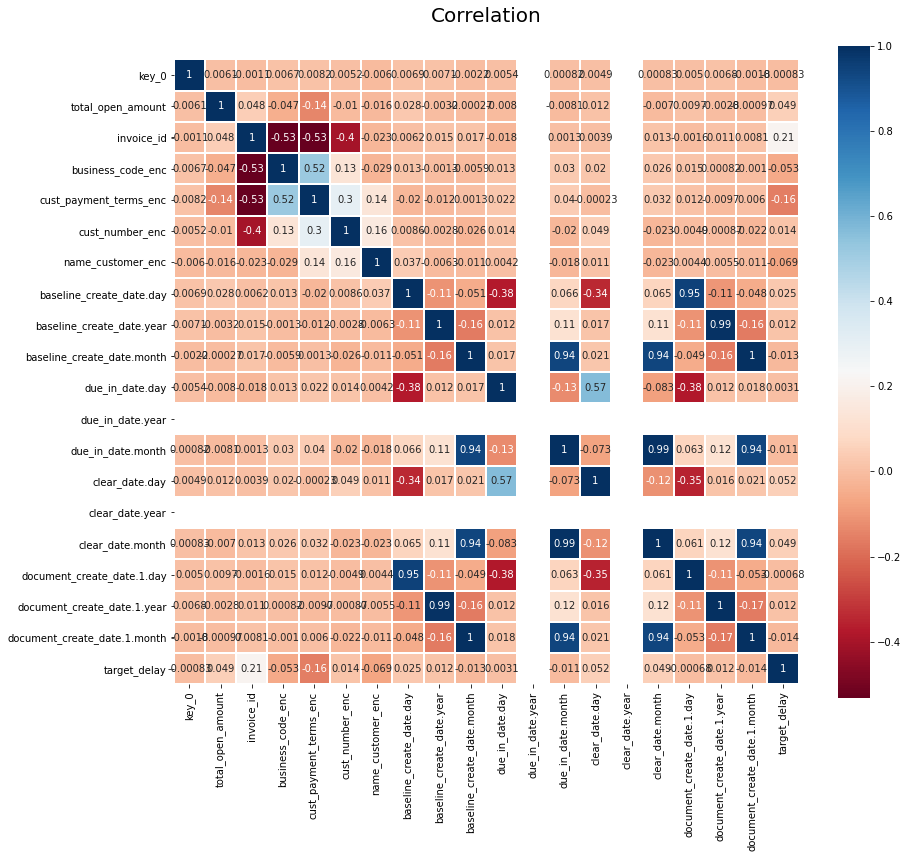

In [4841]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
           square=True, cmap=colormap, linecolor='white', annot=True)

correaltion on df(main train data set) 

<AxesSubplot:>

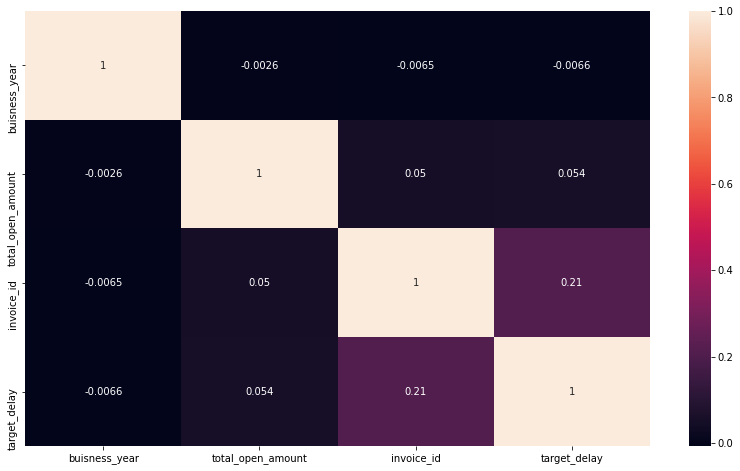

In [4842]:
corr=df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True)

#### Removing the duplicated features

In [4843]:
# transpose the feature matrice
x_train = X_train.T
print ("the number of duplicated features")
print (X_train.duplicated().sum())
#select the duplicated features columns names
duplicated_columns = X_train[X_train.duplicated()].index.values

the number of duplicated features
0


Removing the clear_date coulmn because it highly related with target column and while traning the model with this. it can
give overfiiting condtion so that why we will drop the clear date column

In [4844]:
X_train ,X_val, X_test = drop_columnenc(["clear_date.year"])

In [4845]:
X_train ,X_val, X_test = drop_columnenc(["clear_date.month"])

In [4846]:
X_train ,X_val, X_test = drop_columnenc(["clear_date.day"])

In [4847]:
X_train.shape

(26688, 15)

In [4848]:
X_val.shape

(5719, 15)

In [4849]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5719 entries, 1867 to 11754
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   total_open_amount             5719 non-null   float64
 1   invoice_id                    5719 non-null   float64
 2   business_code_enc             5719 non-null   int32  
 3   cust_payment_terms_enc        5719 non-null   int32  
 4   cust_number_enc               5719 non-null   int32  
 5   name_customer_enc             5719 non-null   int32  
 6   baseline_create_date.day      5719 non-null   int64  
 7   baseline_create_date.year     5719 non-null   int64  
 8   baseline_create_date.month    5719 non-null   int64  
 9   due_in_date.day               5719 non-null   int64  
 10  due_in_date.year              5719 non-null   int64  
 11  due_in_date.month             5719 non-null   int64  
 12  document_create_date.1.day    5719 non-null   int64  
 13 

#### Log transformation (total_open_amount)

In [4850]:
X_train['total_open_amount'] = np.log(X_train['total_open_amount'])

In [4851]:
X_val['total_open_amount'] = np.log(X_val['total_open_amount'])

In [4852]:
X_test['total_open_amount'] = np.log(X_test['total_open_amount'])

# Modelling

In [4853]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import xgboost as xgb

## Linear Regression

In [4854]:
MSE_Score1 = []
R2_Score1 = []
Algorithm1 = []


In [4855]:
Algorithm1.append('Linear Regression')
clf1 = LinearRegression()
clf1.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf1.predict(X_val)

In [4856]:
MSE_Score1.append(mean_squared_error(y_val, predicted))
R2_Score1.append(r2_score(y_val, predicted))

In [4857]:
MSE_Score1 , R2_Score1 

([27.859763486525864], [0.06012876530279809])

## Decision Tree Regressor

In [4858]:
MSE_Score2 = []
R2_Score2 = []
Algorithm2 = []

In [4859]:
Algorithm2.append('Decision Tree Regressor')
clf2 = DecisionTreeRegressor()
clf2.fit(X_train, y_train)


predicted = clf2.predict(X_val)

In [4860]:
MSE_Score2.append(mean_squared_error(y_val, predicted))
R2_Score2.append(r2_score(y_val, predicted))

In [4861]:
MSE_Score2 , R2_Score2 

([46.1531736317538], [-0.5570139462041812])

## Random Forest Regressor

In [4862]:
MSE_Score3 = []
R2_Score3 = []
Algorithm3 = []

In [4863]:
Algorithm3.append('Random Forest Regressor')
clf3 = RandomForestRegressor()
clf3.fit(X_train, y_train)
predicted = clf3.predict(X_val)

In [4864]:
MSE_Score3.append(mean_squared_error(y_val, predicted))
R2_Score3.append(r2_score(y_val, predicted))

In [4865]:
MSE_Score3 , R2_Score3 

([23.985843101940898], [0.1908185443721524])

## Support Vector Regression

In [4866]:
from sklearn.svm import SVR

In [4867]:
MSE_Score4 = []
R2_Score4 = []
Algorithm4 = []

In [4868]:
Algorithm4.append('Support Vector Regression')
clf4 = SVR()
clf4.fit(X_train, y_train)
predicted = clf4.predict(X_val)

In [4869]:
MSE_Score4.append(mean_squared_error(y_val, predicted))
R2_Score4.append(r2_score(y_val, predicted))

In [4870]:
MSE_Score4 , R2_Score4 

([29.001065018561125], [0.02162605222001901])

#### After comparing the all models result I came to conclusion that Random Forest Regressor will gives the result on the dataset 
#### because mse(mean squared error) and r2_score is minimum when trainnig the model on Random Forest Regressor algorithm.

#### so Algorithm = Random Forest Regressor algorithm

#### now prediction on the X_test set just to confirm that the model is not getting overfitted By Random Forest Regressor algorithm

In [4871]:
MSE_Score5 = []
R2_Score5 = []
Algorithm5 = []

In [4872]:
Algorithm5.append('Random Forest Regressor')
clf5 = RandomForestRegressor()
clf5.fit(X_train, y_train)
predicted = clf5.predict(X_test)

In [4873]:
MSE_Score5.append(mean_squared_error(y_test, predicted))
R2_Score5.append(r2_score(y_test, predicted))

In [4874]:
MSE_Score5 , R2_Score5 

([24.516588581919915], [0.07720540132270914])

# Preprocessing and Feature Engieering & Selection on df2(main test dataset)

In [4875]:
df2

business_code cust_number        name_customer clear_date  \
2              U001  0200793513       KROGER systems        NaN   
3              U001  0200761734         H E BUT corp        NaN   
6              U001  0200792734              MDV/ co        NaN   
10             U001  0200769623           WAL-MAR us        NaN   
16             U001  0200762301   C&S WH corporation        NaN   
...             ...         ...                  ...        ...   
49977          U001  0200769623          WAL-MAR llc        NaN   
49980          U001  0200519201            KROGE llc        NaN   
49984          U001  0200705089           JETR trust        NaN   
49989          U001  0200769623           WAL-MAR in        NaN   
49991          U001  0200769623  WAL-MAR corporation        NaN   

       buisness_year        doc_id posting_date  document_create_date  \
2             2020.0  1.930702e+09   2020-03-25              20200325   
3             2020.0  1.930676e+09   2020-03-23              20200320   
6             2020.0  1.930844e+09   2020-05-01              20200501   
10            2020.0  1.930671e+09   2020-03-20              20200319   
16            2020.0  1.930664e+09   2020-03-18              20200317   
...              ...           ...          ...                   ...   
49977         2020.0  1.930853e+09   2020-05-03              20200503   
49980         2020.0  1.930708e+09   2020-03-27              20200326   
49984         2020.0  1.930830e+09   2020-04-28              20200427   
49989         2020.0  1.930785e+09   2020-04-15              20200414   
49991         2020.0  1.930692e+09   2020-03-25              20200324   

       document_create_date.1  due_in_date invoice_currency document type  \
2                    20200325   20200409.0              USD            RV   
3                    20200323   20200407.0              USD            RV   
6                    20200501   20200516.0              USD            RV   
10                   20200320   20200404.0              USD            RV   
16                   20200318   20200402.0              USD            RV   
...                       ...          ...              ...           ...   
49977                20200503   20200518.0              USD            RV   
49980                20200327   20200411.0              USD            RV   
49984                20200428   20200513.0              USD            RV   
49989                20200415   20200430.0              USD            RV   
49991                20200325   20200409.0              USD            RV   

       posting_id  area_business  total_open_amount  baseline_create_date  \
2             1.0            NaN          104111.31            20200325.0   
3             1.0            NaN           75339.82            20200323.0   
6             1.0            NaN           33926.72            20200501.0   
10            1.0            NaN             661.11            20200320.0   
16            1.0            NaN           23857.56            20200318.0   
...           ...            ...                ...                   ...   
49977         1.0            NaN           29497.83            20200503.0   
49980         1.0            NaN           52598.46            20200327.0   
49984         1.0            NaN            5765.06            20200428.0   
49989         1.0            NaN            2352.97            20200415.0   
49991         1.0            NaN           40720.37            20200325.0   

      cust_payment_terms    invoice_id  isOpen  
2                   NAA8  1.930702e+09       1  
3                   NAA8  1.930676e+09       1  
6                   NAA8  1.930844e+09       1  
10                  NAH4  1.930671e+09       1  
16                  NAC6  1.930664e+09       1  
...                  ...           ...     ...  
49977               NAH4  1.930853e+09       1  
49980               NAA8  1.930708e+09       1  
49984               NAA8  1.93083

### Preprocessing

In [4876]:
df2.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             10000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [4877]:
#dropping the area_business column
df2.drop("area_business",axis='columns',inplace=True)

In [4878]:
#finding constant column and removing them
unique_cols =  [x for x in df2.columns if df2[x].nunique()==1] 
print(unique_cols)


['buisness_year', 'document type', 'posting_id', 'isOpen']


In [4879]:
df2.drop(unique_cols,axis=1,inplace=True)
df2.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date', 'doc_id',
       'posting_date', 'document_create_date', 'document_create_date.1',
       'due_in_date', 'invoice_currency', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id'],
      dtype='object')

In [4880]:
duplicate = df2[df2.duplicated()]
print("duplicate rows")
duplicate

duplicate rows


business_code cust_number        name_customer clear_date        doc_id  \
2094           U001  0200762301          C&S WH corp        NaN  1.930751e+09   
4067           U001  0200769623  WAL-MAR corporation        NaN  1.930619e+09   
5624           U001  0200704858           WAKE trust        NaN  1.930606e+09   
7624           CA02  0140106408               WAL-M         NaN  2.960628e+09   
8201           U001  0200769623      WAL-MAR systems        NaN  1.930838e+09   
...             ...         ...                  ...        ...           ...   
49493          U001  0200704045        RA associates        NaN  1.930764e+09   
49523          U001  0200748108            KROGER in        NaN  1.930583e+09   
49577          U001   200705372             FR trust        NaN  1.930684e+09   
49863          U001  0200776463    KROGE corporation        NaN  1.930760e+09   
49980          U001  0200519201            KROGE llc        NaN  1.930708e+09   

      posting_date  document_create_date  document_create_date.1  due_in_date  \
2094    2020-04-06              20200405                20200406   20200421.0   
4067    2020-03-07              20200307                20200307   20200322.0   
5624    2020-03-06              20200305                20200306   20200321.0   
7624    2020-04-10              20200410                20200410   20200421.0   
8201    2020-05-01              20200429                20200501   20200516.0   
...            ...                   ...                     ...          ...   
49493   2020-04-09              20200408                20200409   20200424.0   
49523   2020-02-29              20200228                20200229   20200315.0   
49577   2020-03-23              20200321                20200323   20200407.0   
49863   2020-04-07              20200407                20200407   20200422.0   
49980   2020-03-27              20200326                20200327   20200411.0   

      invoice_currency  total_open_amount  baseline_create_date  \
2094               USD           65718.47            20200406.0   
4067               USD           49053.65            20200307.0   
5624               USD           17083.27            20200306.0   
7624               CAD            6607.56            20200411.0   
8201               USD            6871.97            20200501.0   
...                ...                ...                   ...   
49493              USD           24813.59            20200409.0   
49523              USD           36197.95            20200229.0   
49577              USD           79730.12            20200323.0   
49863              USD          112903.46            20200407.0   
49980              USD           52598.46            20200327.0   

      cust_payment_terms    invoice_id  
2094                NAC6  1.930751e+09  
4067                NAH4  1.930619e+09  
5624                NAA8  1.930606e+09  
7624                CA10  2.960628e+09  
8201                NAH4  1.930838e+09  
...                  ...           ...  
49493               NAA8  1.930764e+09  
49523               NAA8  1.930583e+09  
49577               NAA8  1.930684e+09  
49863               NAA8  1.930760e+09  
49980               NAA8  1.930708e+09  

[324 rows x 14 columns]

In [4881]:
#drop duplicates from datafroame
df2.drop_duplicates(inplace=True)
df2.shape

(9676, 14)

In [4882]:
df2.head()

business_code cust_number       name_customer clear_date        doc_id  \
2           U001  0200793513      KROGER systems        NaN  1.930702e+09   
3           U001  0200761734        H E BUT corp        NaN  1.930676e+09   
6           U001  0200792734             MDV/ co        NaN  1.930844e+09   
10          U001  0200769623          WAL-MAR us        NaN  1.930671e+09   
16          U001  0200762301  C&S WH corporation        NaN  1.930664e+09   

   posting_date  document_create_date  document_create_date.1  due_in_date  \
2    2020-03-25              20200325                20200325   20200409.0   
3    2020-03-23              20200320                20200323   20200407.0   
6    2020-05-01              20200501                20200501   20200516.0   
10   2020-03-20              20200319                20200320   20200404.0   
16   2020-03-18              20200317                20200318   20200402.0   

   invoice_currency  total_open_amount  baseline_create_date  \
2               USD          104111.31            20200325.0   
3               USD           75339.82            20200323.0   
6               USD           33926.72            20200501.0   
10              USD             661.11            20200320.0   
16              USD           23857.56            20200318.0   

   cust_payment_terms    invoice_id  
2                NAA8  1.930702e+09  
3                NAA8  1.930676e+09  
6                NAA8  1.930844e+09  
10               NAH4  1.930671e+09  
16               NAC6  1.930664e+09

In [4883]:
df2["invoice_id"].equals(df2["doc_id"])

True

In [4884]:
df2.drop("doc_id",axis='columns',inplace=True)

In [4885]:
df2.drop("posting_date",axis='columns',inplace=True)

In [4886]:
df2.drop("document_create_date",axis='columns',inplace=True) 

In [4887]:
df2=df2.sort_values(['baseline_create_date'], ascending=True)

In [4888]:
x = df2[df2['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.79)    

for i in x.index:
    df2['total_open_amount'][i] = 0.79*x[i]


In [4889]:
df2.drop("invoice_currency",axis='columns',inplace=True)


##### dropping clear date column from df2 and make new dataframe(X_df2)

In [4890]:
X_df2 = df2.drop(['clear_date'],axis=1)

In [4891]:
df2.drop(['clear_date'],axis="columns",inplace=True)

In [4892]:
#changing the data type of dates cloumn to date-time
X_df2.loc[:,'document_create_date.1'] = pd.to_datetime(X_df2['document_create_date.1'], format='%Y%m%d')
X_df2.loc[:,'baseline_create_date'] = pd.to_datetime(X_df2['baseline_create_date'], format='%Y%m%d')
X_df2.loc[:,'due_in_date'] = pd.to_datetime(X_df2['due_in_date'], format='%Y%m%d')

In [4893]:
#X_df2["clear_date"]= pd.to_datetime(df["clear_date"])
X_df2.head()

business_code cust_number      name_customer document_create_date.1  \
33382          U001  0200754118            ARMY co             2020-05-05   
23304          U001  0200754118    ARMY associates             2020-04-24   
18524          CA02  0140104429  COSTCO foundation             2020-03-02   
29104          U001  0200769623         WAL-MAR in             2020-02-27   
42972          U001  0200797452             US  co             2020-02-27   

      due_in_date  total_open_amount baseline_create_date cust_payment_terms  \
33382  2020-01-31         738.770000           2020-01-16               NAM3   
23304  2020-01-31         110.310000           2020-01-16               NAM3   
18524  2020-02-22         317.317404           2020-02-12               CA10   
29104  2020-03-13       46817.550000           2020-02-27               NAH4   
42972  2020-03-18       39727.160000           2020-02-27               NAD1   

         invoice_id  
33382  1.930858e+09  
23304  1.930822e+09  
18524  2.960618e+09  
29104  1.930577e+09  
42972  1.930578e+09

###  Featured Engineering

In [4894]:
from sklearn.preprocessing import LabelEncoder
business_code_enc = LabelEncoder()
business_code_enc.fit(X_df2['business_code'])
X_df2['business_code_enc'] = business_code_enc.transform(X_df2['business_code'])

In [4895]:
X_df2.drop(['business_code'], axis =1,inplace=True)

In [4896]:
cust_payment_terms_enc = LabelEncoder()
cust_payment_terms_enc.fit(X_df2['cust_payment_terms'])
X_df2['cust_payment_terms_enc'] = cust_payment_terms_enc.transform(X_df2['cust_payment_terms'])

In [4897]:
X_df2.drop(['cust_payment_terms'], axis =1,inplace=True)

In [4898]:
cust_number_enc = LabelEncoder()
cust_number_enc.fit(X_df2['cust_number'])
X_df2['cust_number_enc'] = cust_number_enc.transform(X_df2['cust_number'])

In [4899]:
X_df2.drop(['cust_number'], axis =1,inplace=True)

In [4900]:
name_customer_enc = LabelEncoder()
name_customer_enc.fit(X_df2['name_customer'])
X_df2['name_customer_enc'] = name_customer_enc.transform(X_df2['name_customer'])

In [4901]:
X_df2.drop(['name_customer'], axis =1,inplace=True)

In [4902]:
for col in ['baseline_create_date','due_in_date','document_create_date.1' ]:
    X_df2['{}.day'.format(col)]=X_df2[col].dt.day
    X_df2['{}.year'.format(col)]=X_df2[col].dt.year
    X_df2['{}.month'.format(col)]=X_df2[col].dt.month
    

In [4903]:
X_df2.drop(['baseline_create_date'], axis =1,inplace=True)
X_df2.drop(['due_in_date'], axis =1,inplace=True)



In [4904]:
X_df2.drop(['document_create_date.1'], axis =1,inplace=True)

In [4905]:
#X_df2.drop(['clear_date.year'], axis =1,inplace=True)

In [4906]:
X_df2.shape

(9676, 15)

In [4907]:
X_train.shape

(26688, 15)

In [4908]:
X_df2.columns

Index(['total_open_amount', 'invoice_id', 'business_code_enc',
       'cust_payment_terms_enc', 'cust_number_enc', 'name_customer_enc',
       'baseline_create_date.day', 'baseline_create_date.year',
       'baseline_create_date.month', 'due_in_date.day', 'due_in_date.year',
       'due_in_date.month', 'document_create_date.1.day',
       'document_create_date.1.year', 'document_create_date.1.month'],
      dtype='object')

In [4909]:
X_train.columns

Index(['total_open_amount', 'invoice_id', 'business_code_enc',
       'cust_payment_terms_enc', 'cust_number_enc', 'name_customer_enc',
       'baseline_create_date.day', 'baseline_create_date.year',
       'baseline_create_date.month', 'due_in_date.day', 'due_in_date.year',
       'due_in_date.month', 'document_create_date.1.day',
       'document_create_date.1.year', 'document_create_date.1.month'],
      dtype='object')

In [4910]:
X_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9676 entries, 33382 to 18831
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   total_open_amount             9676 non-null   float64
 1   invoice_id                    9676 non-null   float64
 2   business_code_enc             9676 non-null   int32  
 3   cust_payment_terms_enc        9676 non-null   int32  
 4   cust_number_enc               9676 non-null   int32  
 5   name_customer_enc             9676 non-null   int32  
 6   baseline_create_date.day      9676 non-null   int64  
 7   baseline_create_date.year     9676 non-null   int64  
 8   baseline_create_date.month    9676 non-null   int64  
 9   due_in_date.day               9676 non-null   int64  
 10  due_in_date.year              9676 non-null   int64  
 11  due_in_date.month             9676 non-null   int64  
 12  document_create_date.1.day    9676 non-null   int64  
 13

# Lets Predict the date

In [4911]:
final_pred = clf3.predict(X_df2)

In [4912]:
final_pred = pd.Series(final_pred,name='target_delay')

In [4913]:
df2.reset_index(drop=True,inplace=True)

In [4914]:
Result = df2.merge(final_pred , on = X_df2.index )
Result

key_0 business_code cust_number       name_customer  \
0     33382          U001  0200754118             ARMY co   
1     23304          U001  0200754118     ARMY associates   
2     18524          CA02  0140104429   COSTCO foundation   
3     29104          U001  0200769623          WAL-MAR in   
4     42972          U001  0200797452              US  co   
...     ...           ...         ...                 ...   
9671  26479          CA02  0100027744       OMEGA AD corp   
9672  33999          U001  0200915438           GROC corp   
9673   6488          U001  0200763229           MAINES us   
9674   9270          U001  0200756072  REINHA corporation   
9675  18831          U001  0200756072           REINHA us   

      document_create_date.1  due_in_date  total_open_amount  \
0                   20200505   20200131.0         738.770000   
1                   20200424   20200131.0         110.310000   
2                   20200302   20200222.0         317.317404   
3                   20200227   20200313.0       46817.550000   
4                   20200227   20200318.0       39727.160000   
...                      ...          ...                ...   
9671                20200516   20200516.0       12825.504640   
9672                20200518   20200602.0        9291.000000   
9673                20200519   20200603.0       18506.940000   
9674                20200521   20200620.0          20.950000   
9675                20200522   20200621.0           1.170000   

      baseline_create_date cust_payment_terms    invoice_id  target_delay  
0               20200116.0               NAM3  1.930858e+09          5.79  
1               20200116.0               NAM3  1.930822e+09          5.88  
2               20200212.0               CA10  2.960618e+09          5.94  
3               20200227.0               NAH4  1.930577e+09          2.47  
4               20200227.0               NAD1  1.930578e+09         -7.74  
...                    ...                ...           ...           ...  
9671            20200516.0               CAB1  2.960634e+09          5.58  
9672            20200518.0               NAA8  1.930907e+09          4.04  
9673            20200519.0               NAA8  1.930917e+09          2.75  
9674            20200521.0               NAD5  1.930926e+09         -0.03  
9675            20200522.0               NAD5  1.930934e+09         -0.08  

[9676 rows x 11 columns]

In [4915]:
Result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9676 entries, 0 to 9675
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   key_0                   9676 non-null   int64  
 1   business_code           9676 non-null   object 
 2   cust_number             9676 non-null   object 
 3   name_customer           9676 non-null   object 
 4   document_create_date.1  9676 non-null   int64  
 5   due_in_date             9676 non-null   float64
 6   total_open_amount       9676 non-null   float64
 7   baseline_create_date    9676 non-null   float64
 8   cust_payment_terms      9676 non-null   object 
 9   invoice_id              9676 non-null   float64
 10  target_delay            9676 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 907.1+ KB


In [4916]:
Result['target_delay'] = Result['target_delay'].astype(int)

changing the dtype of the target_delay column from float to int 

In [4917]:
Result.head()

key_0 business_code cust_number      name_customer  document_create_date.1  \
0  33382          U001  0200754118            ARMY co                20200505   
1  23304          U001  0200754118    ARMY associates                20200424   
2  18524          CA02  0140104429  COSTCO foundation                20200302   
3  29104          U001  0200769623         WAL-MAR in                20200227   
4  42972          U001  0200797452             US  co                20200227   

   due_in_date  total_open_amount  baseline_create_date cust_payment_terms  \
0   20200131.0         738.770000            20200116.0               NAM3   
1   20200131.0         110.310000            20200116.0               NAM3   
2   20200222.0         317.317404            20200212.0               CA10   
3   20200313.0       46817.550000            20200227.0               NAH4   
4   20200318.0       39727.160000            20200227.0               NAD1   

     invoice_id  target_delay  
0  1.930858e+09             5  
1  1.930822e+09             5  
2  2.960618e+09             5  
3  1.930577e+09             2  
4  1.930578e+09            -7

In [4918]:
Result.loc[:,'due_in_date'] = pd.to_datetime(Result['due_in_date'], format='%Y%m%d')

changing the dtype of due_in_date into datetime

### Bucketization (bucket ageing)

In [4919]:
def bucketization(x):
    if x<0:
        return('advance_payment')
    if x in range(0,6):
        return('(0-5) Days')
    elif x in range(6,11):
        return('(6-10) Days')
    elif x in range(11,16):
        return('(11-15) Days')
    else:
        return('(> 15)')

In [4920]:
Result['Delay Bucket(days)']= pd.Series([bucketization(x=Result['target_delay'][i])  for i in range(len(Result))])
bucket_mapper = {'(< 0) Days':0,'(0-15) Days':1,'(16-30) Days':2,'(> 30) Days':3}

In [4921]:
Result.head()

key_0 business_code cust_number      name_customer  document_create_date.1  \
0  33382          U001  0200754118            ARMY co                20200505   
1  23304          U001  0200754118    ARMY associates                20200424   
2  18524          CA02  0140104429  COSTCO foundation                20200302   
3  29104          U001  0200769623         WAL-MAR in                20200227   
4  42972          U001  0200797452             US  co                20200227   

  due_in_date  total_open_amount  baseline_create_date cust_payment_terms  \
0  2020-01-31         738.770000            20200116.0               NAM3   
1  2020-01-31         110.310000            20200116.0               NAM3   
2  2020-02-22         317.317404            20200212.0               CA10   
3  2020-03-13       46817.550000            20200227.0               NAH4   
4  2020-03-18       39727.160000            20200227.0               NAD1   

     invoice_id  target_delay Delay Bucket(days)  
0  1.930858e+09             5         (0-5) Days  
1  1.930822e+09             5         (0-5) Days  
2  2.960618e+09             5         (0-5) Days  
3  1.930577e+09             2         (0-5) Days  
4  1.930578e+09            -7    advance_payment

In [4922]:
Result['Predicted Payment Date'] = Result['due_in_date'] + pd.to_timedelta(Result['target_delay'], unit='d')

adding the predicting payment date coulmn and adding to due_in_date by changing the dtype of the target delay column
into timedelta

In [4923]:
Result.head()

key_0 business_code cust_number      name_customer  document_create_date.1  \
0  33382          U001  0200754118            ARMY co                20200505   
1  23304          U001  0200754118    ARMY associates                20200424   
2  18524          CA02  0140104429  COSTCO foundation                20200302   
3  29104          U001  0200769623         WAL-MAR in                20200227   
4  42972          U001  0200797452             US  co                20200227   

  due_in_date  total_open_amount  baseline_create_date cust_payment_terms  \
0  2020-01-31         738.770000            20200116.0               NAM3   
1  2020-01-31         110.310000            20200116.0               NAM3   
2  2020-02-22         317.317404            20200212.0               CA10   
3  2020-03-13       46817.550000            20200227.0               NAH4   
4  2020-03-18       39727.160000            20200227.0               NAD1   

     invoice_id  target_delay Delay Bucket(days) Predicted Payment Date  
0  1.930858e+09             5         (0-5) Days             2020-02-05  
1  1.930822e+09             5         (0-5) Days             2020-02-05  
2  2.960618e+09             5         (0-5) Days             2020-02-27  
3  1.930577e+09             2         (0-5) Days             2020-03-15  
4  1.930578e+09            -7    advance_payment             2020-03-11